# Punktacja czasopism w dyscyplinach AEE i ITT
Celem niniejszego dokumentu jest przedstawienie podstawowych informacji statystycznych o czasopismach piunktowanych przez MNISW (lista z lipca 2019).
Przygotowane pliki będzie łatwo jednak skonwertować na listę z nowymi danymi.

In [40]:
import pandas as pd
dane=pd.read_csv('../Analysis Data/Punktacja_MNISW_oraz_IF_dla_AEE_i_ITT.csv')
dane.set_index('Numer z listy MNISW',inplace=True)
dane['Punkty']=dane['Punkty'].astype('category')
dane.head()

,Tytuł,issn,e-issn,AEE,ITT,Punkty,IF
Numer z listy MNISW,,,,,,,
1,2D Materials,2053-1583,2053-1583,True,False,140,7.343
6,3D Printing and Additive Manufacturing,2329-7662,2329-7670,True,False,100,3.259
7,3D Research,2092-6731,2092-6731,True,True,40,NaN
10,4OR-A Quarterly Journal of Operations Research,1619-4500,1614-2411,False,True,70,2.056
76,ACM Communications in Computer Algebra,1932-2232,1932-2240,True,True,20,NaN


## Czasopisma z AEE z podziałem na punktacje

In [30]:
dane[dane.AEE].loc[:,['AEE','Punkty']].groupby(['Punkty']).count()

,AEE
Punkty,
20,505
40,396
70,391
100,262
140,170
200,70


In [31]:
print('Sumaryczna liczba czasopism w dyscyplinie AEE: '+str(sum(dane.AEE)))

Sumaryczna liczba czasopism w dyscyplinie AEE: 1794


## Czasopisma z ITT z podziałem na punktacje

In [32]:
dane[dane.ITT].loc[:,['ITT','Punkty']].groupby(['Punkty']).count()

,ITT
Punkty,
20,606
40,475
70,494
100,386
140,249
200,85


In [33]:
print('Sumaryczna liczba czasopism w dyscyplinie ITT: '+str(sum(dane.ITT)))

Sumaryczna liczba czasopism w dyscyplinie ITT: 2295


## Czasopisma z wspólne z podziałem na punktacje

In [34]:
dane[dane.AEE&dane.ITT].loc[:,['AEE','ITT','Punkty']].groupby(['Punkty']).count()

,AEE,ITT
Punkty,,
20,219,219
40,176,176
70,162,162
100,126,126
140,95,95
200,32,32


In [16]:
print('Sumaryczna liczba czasopism wspólnych dla obu dyscyplin: '+str(sum(dane.ITT&dane.AEE)))

Sumaryczna liczba czasopism wspólnych dla obu dyscyplin: 810


## Związki punktacji MNISW z IF w dyscyplinie AEE

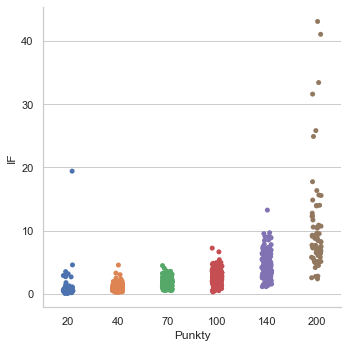

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.catplot(x="Punkty", y="IF", data=dane[dane.AEE]);

#dane[dane.AEE].plot(kind='scatter',x='IF',y='Punkty',yticks=dane.Punkty.unique())
#plt.show()

- Jak widać związków nie ma. 
- Dla 20 punktowych jest kilka zaskakujących outlierów. W szczególności **Science Robotics**, które chyba powinno mieć 200.

### Najwyższe impact factory:


In [44]:
dane[dane.AEE].sort_values('IF',ascending=False).head(20)

,Tytuł,issn,e-issn,AEE,ITT,Punkty,IF
Numer z listy MNISW,,,,,,,
14801,NATURE,0028-0836,1476-4687,True,False,200,43.070
18197,SCIENCE,0036-8075,1095-9203,True,False,200,41.037
14826,Nature Nanotechnology,1748-3387,1748-3395,True,False,200,33.407
14828,Nature Photonics,1749-4885,1749-4893,True,False,200,31.583
430,ADVANCED MATERIALS,0935-9648,1521-4095,True,False,200,25.809
424,Advanced Energy Materials,1614-6832,1614-6840,True,False,200,24.884
18241,Science Robotics,2470-9476,2470-9476,True,False,20,19.400
8005,IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACH...,0162-8828,1939-3539,True,True,200,17.730
133,ACS Energy Letters,2380-8195,2380-8195,True,False,200,16.331


### Czasopisma z IEEE

In [58]:
pd.set_option('display.max_rows', 500)
dane[dane.AEE&dane['Tytuł'].str.contains('IEEE')].sort_values(['Punkty','IF'],ascending=False)

,Tytuł,issn,e-issn,AEE,ITT,Punkty,IF
Numer z listy MNISW,,,,,,,
8005,IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACH...,0162-8828,1939-3539,True,True,200,17.730
8001,IEEE Transactions on Neural Networks and Learn...,2162-237X,2162-2388,True,True,200,11.683
16512,PROCEEDINGS OF THE IEEE,0018-9219,1558-2256,True,True,200,10.694
8017,IEEE Transactions on Smart Grid,1949-3053,1949-3061,True,True,200,10.486
7966,IEEE Transactions on Cybernetics,2168-2267,2168-2275,True,True,200,10.387
7899,IEEE Internet of Things Journal,2327-4662,2327-4662,True,True,200,9.515
7977,IEEE TRANSACTIONS ON FUZZY SYSTEMS,1063-6706,1941-0034,True,True,200,8.759
7976,IEEE TRANSACTIONS ON EVOLUTIONARY COMPUTATION,1089-778X,1941-0026,True,True,200,8.508
8019,IEEE Transactions on Sustainable Energy,1949-3029,NaN,True,False,200,7.650


## Czasopisma z MDPI


In [53]:
MDPI=pd.read_csv('../Analysis Data/MDPI_journals.csv')

MDPI_filter=((dane.issn.isin(MDPI.ISSN)) | (dane['e-issn'].isin(MDPI.ISSN)))

dane[MDPI_filter].sort_values(['Punkty','IF'],ascending=False)

,Tytuł,issn,e-issn,AEE,ITT,Punkty,IF
Numer z listy MNISW,,,,,,,
17163,Remote Sensing,2072-4292,2072-4292,True,True,100,4.118
18379,SENSORS,1424-8220,1424-8220,True,True,100,3.031
5672,Energies,1996-1073,1996-1073,True,False,100,2.707
5773,Entropy,1099-4300,1099-4300,False,True,100,2.419
5580,Electronics,2079-9292,2079-9292,True,False,100,1.764
14742,Nanomaterials,2079-4991,2079-4991,True,False,70,4.034
2760,Brain Sciences,2076-3425,2976-3425,False,True,70,2.786
14348,Micromachines,2072-666X,2072-666X,True,False,70,2.426
1518,Applied Sciences-Basel,2076-3417,2076-3417,True,True,70,2.217
